In [179]:
%matplotlib inline
import os
import seaborn as sns
import numpy as np
import pandas as pd
from pandas import DataFrame
from geopandas.tools import sjoin
import matplotlib.pylab as plt

In [374]:
import pysal as ps
import geopandas as gpd

In [14]:
# download taxi data
from pandas.io.gbq import read_gbq

project = "spheric-crow-161317"
cool_query = "select * from `bigquery-public-data.new_york.tlc_yellow_trips_2016` where ( \
(pickup_latitude between (40.7508860 - 0.002) and (40.7508860 + 0.002)) and \
(pickup_longitude between (-73.9839130 - 0.01) and (-73.9839130 + 0.01)) and \
(dropoff_latitude between (40.7048660 - 0.0021) and (40.7048660 + 0.0021)) and \
(dropoff_longitude between (-74.0127830 - 0.002) and (-74.0127830 + 0.002)))"

df3 = read_gbq(query=cool_query, project_id=project, dialect='standard')


Requesting query... ok.
Query running...
Query done.
Processed: 250.6 Mb

Retrieving results...
Got 296 rows.

Total time taken 2.54 s.
Finished at 2017-03-25 11:24:14.


In [201]:
# download 311 data
project = "spheric-crow-161317"
sample_query = "SELECT DISTINCT * FROM \
`bigquery-public-data.new_york.311_service_requests` WHERE complaint_type = 'Traffic' "

df2 = read_gbq(query=sample_query, project_id=project, dialect='standard')


Requesting query... ok.
Query running...
Query done.
Cache hit.

Retrieving results...
  Got page: 2; 50.0% done. Elapsed 9.46 s.
  Got page: 3; 75.0% done. Elapsed 14.49 s.
  Got page: 4; 100.0% done. Elapsed 19.36 s.
Got 26303 rows.

Total time taken 25.02 s.
Finished at 2017-03-25 15:15:30.


In [108]:
df3['pickup_weekday'] = df3.pickup_datetime.dt.weekday

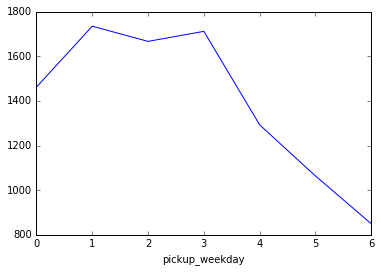

In [114]:
df3.groupby(["pickup_weekday"]).size().plot()

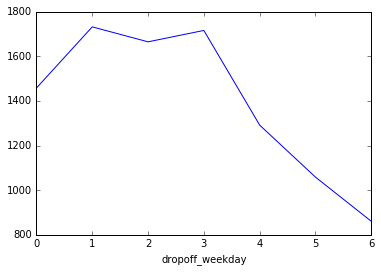

In [113]:
df3['dropoff_weekday'] = df3.dropoff_datetime.dt.weekday
df3.groupby(["dropoff_weekday"]).size().plot()

In [134]:
df3["trip_duration"] = (df3.dropoff_datetime-df3.pickup_datetime)
df3["trip_duration"] = df3["trip_duration"].apply(lambda x: x/np.timedelta64(1,'m'))

In [326]:
df_clean["pickup_weekday"].dtype

dtype('int64')

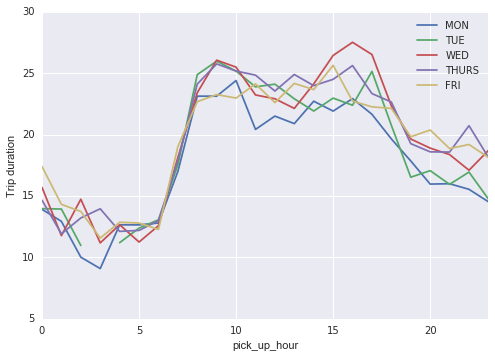

In [336]:
df_weekday = df_clean[df_clean["pickup_weekday"]<5]
df_weekday.groupby(["pickup_weekday", "pick_up_hour"])["trip_duration"
                                                      ].mean().unstack().T.plot()
plt.ylabel("Trip duration")
plt.legend(labels=["MON", "TUE", "WED", "THURS", "FRI"])

In [285]:
df3["trip_duration"].describe()

count    9783.000000
mean       22.389652
std        45.522042
min         7.583333
25%        15.366667
50%        19.616667
75%        25.033333
max      1438.316667
Name: trip_duration, dtype: float64

In [375]:
# df_clean["drop_off_hour"] = df3.dropoff_datetime.dt.hour
# df_clean["pick_up_hour"] = df3.pickup_datetime.dt.hour
df_clean["trip_month"] = df_clean.pickup_datetime.dt.month

/Users/Henrilin28/.pyenv/versions/2.7.8/envs/virtual_2.7/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


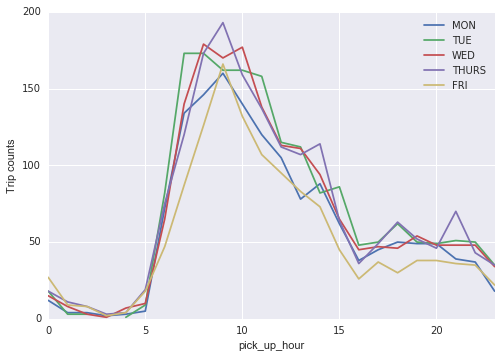

In [335]:
df_weekday = df_clean[df_clean["pickup_weekday"]<5]
df_weekday.groupby(["pickup_weekday", "pick_up_hour"]).size().unstack().T.plot()
plt.ylabel("Trip counts")
plt.legend(labels=["MON", "TUE", "WED", "THURS", "FRI"])

In [157]:
df_clean = df3[df3["trip_duration"] <100]

In [288]:
len(df_clean[df_clean["trip_duration"]>27])/ (1.0* len(df_clean))

0.18581807019338994

In [290]:
prob = df_clean[df_clean["trip_duration"]>27].groupby(["pick_up_hour"]).size() / (1.0 * df_clean.groupby(["pick_up_hour"]).size())

In [341]:
a = df_weekday[df_weekday["trip_duration"]>27].groupby(["pick_up_hour", "pickup_weekday"]).size()
b =  df_weekday.groupby(["pick_up_hour","pickup_weekday"]).size()

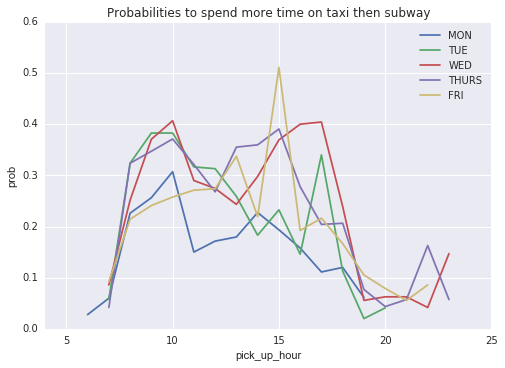

In [357]:
pb = a/(1.0*b)
pb.unstack().plot()
plt.title("Probabilities to spend more time on taxi then subway")
plt.ylabel("prob")
plt.xlim(4,25)
plt.legend(labels=["MON", "TUE", "WED", "THURS", "FRI"])

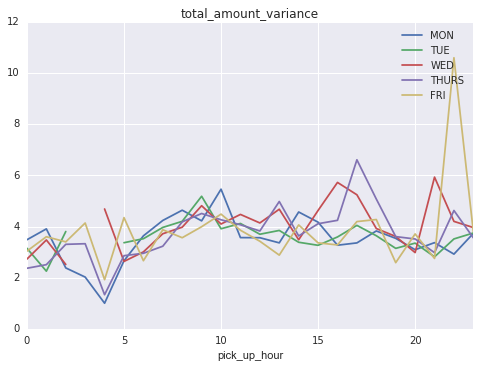

In [361]:
df_weekday.groupby(["pick_up_hour", "pickup_weekday"])["total_amount"].std().unstack().plot()
plt.title("total_amount_variance")
plt.legend(labels=["MON", "TUE", "WED", "THURS", "FRI"])

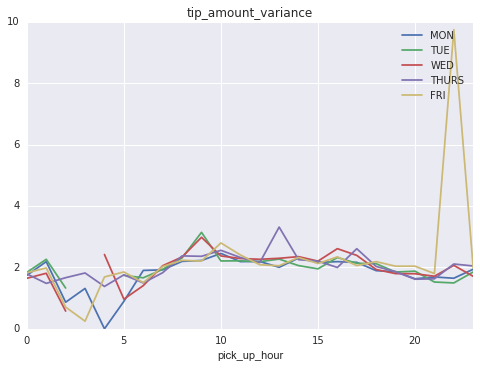

In [365]:
df_weekday.groupby(["pick_up_hour", "pickup_weekday"])["tip_amount"].std().unstack().plot()
plt.title("tip_amount_variance")
plt.legend(labels=["MON", "TUE", "WED", "THURS", "FRI"])

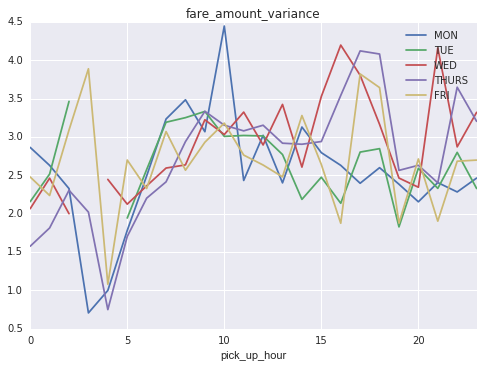

In [366]:
df_weekday.groupby(["pick_up_hour", "pickup_weekday"])["fare_amount"].std().unstack().plot()
plt.title("fare_amount_variance")
plt.legend(labels=["MON", "TUE", "WED", "THURS", "FRI"])

In [363]:
df_weekday.columns

Index([u'vendor_id', u'pickup_datetime', u'dropoff_datetime',
       u'passenger_count', u'trip_distance', u'pickup_longitude',
       u'pickup_latitude', u'rate_code', u'store_and_fwd_flag',
       u'dropoff_longitude', u'dropoff_latitude', u'payment_type',
       u'fare_amount', u'extra', u'mta_tax', u'tip_amount', u'tolls_amount',
       u'imp_surcharge', u'total_amount', u'pickup_weekday',
       u'dropoff_weekday', u'trip_duration', u'pick_up_hour', u'drop_off_hour',
       u'trip_month'],
      dtype='object')

In [378]:
df_weekday["unmet_demand"] = 6 - df_weekday["passenger_count"]

/Users/Henrilin28/.pyenv/versions/2.7.8/envs/virtual_2.7/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [ ]:
passengers

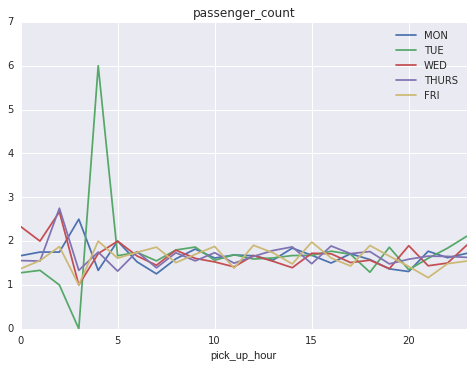

In [385]:
passengers = df_weekday[df_weekday["passenger_count"] !=0]
passengers.groupby(["pick_up_hour", "pickup_weekday"])["passenger_count"
                                                      ].mean().unstack().fillna(0).plot()
plt.title("passenger_count")
plt.ylim(0,7)
plt.legend(labels=["MON", "TUE", "WED", "THURS", "FRI"])

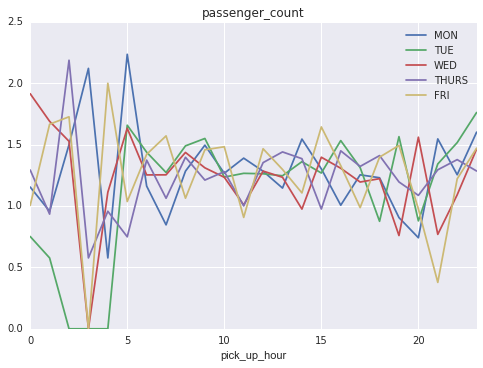

In [387]:
df_weekday.groupby(["pick_up_hour", "pickup_weekday"])["unmet_demand"
                                                      ].std().unstack().fillna(0).plot()
plt.title("passenger_count")
plt.legend(labels=["MON", "TUE", "WED", "THURS", "FRI"])

In [299]:
df_clean.columns

Index([u'vendor_id', u'pickup_datetime', u'dropoff_datetime',
       u'passenger_count', u'trip_distance', u'pickup_longitude',
       u'pickup_latitude', u'rate_code', u'store_and_fwd_flag',
       u'dropoff_longitude', u'dropoff_latitude', u'payment_type',
       u'fare_amount', u'extra', u'mta_tax', u'tip_amount', u'tolls_amount',
       u'imp_surcharge', u'total_amount', u'pickup_weekday',
       u'dropoff_weekday', u'trip_duration', u'pick_up_hour', u'drop_off_hour',
       u'trip_month'],
      dtype='object')

In [ ]:
df_clean.groupby(["pick_up_hour"])["passenger_count"].mean().plot()

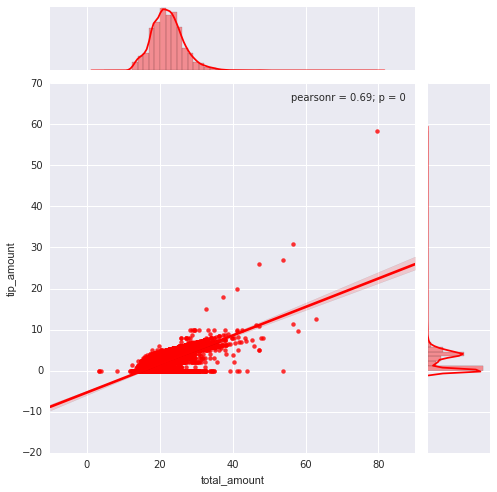

In [301]:
g = sns.jointplot("total_amount", "tip_amount", data=df_clean, kind="reg", color="r", size=7)

In [229]:
incident = pd.read_csv("data/complaints.csv")
incident = incident.drop('Unnamed: 0', 1)
incident = incident.dropna()

In [230]:
incident["created_date"] = pd.to_datetime(incident.created_date)

In [231]:
def add_temporal_feature(timecolumn, df):
    df[timecolumn] = pd.to_datetime(df[timecolumn])
    df["weekday"] = df[timecolumn].dt.weekday
    df["month"] = df[timecolumn].dt.month
    df["hour"] = df[timecolumn].dt.hour
    return df

In [232]:
temporal_incident = add_temporal_feature("created_date", incident)

In [233]:
temporal_incident.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1842 entries, 1 to 1865
Data columns (total 14 columns):
unique_key        1842 non-null int64
created_date      1842 non-null datetime64[ns]
closed_date       1842 non-null object
agency            1842 non-null object
complaint_type    1842 non-null object
descriptor        1842 non-null object
borough           1842 non-null object
incident_zip      1842 non-null int64
latitude          1842 non-null float64
longitude         1842 non-null float64
location          1842 non-null object
weekday           1842 non-null int64
month             1842 non-null int64
hour              1842 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(5), object(6)
memory usage: 215.9+ KB


In [240]:
temporal_taffic = incident.groupby(["weekday", "incident_zip"]).size().unstack().T.fillna(0)

In [252]:
a = temporal_taffic.reset_index().rename(columns={"incident_zip": "ZIPCODE"})


shape_path= "NYC_shapefiles/ZIP_CODE_040114.shp"
zip_shape = GeoDataFrame.from_file(shape_path)
zip_shape = zip_shape[zip_shape["PO_NAME"] == "New York"]
zip_shape = zip_shape.merge(a, on="ZIPCODE")

In [253]:

def plot_map(attr):
    zip_shape = zip_shape.to_crs(epsg=4326)
    f, ax = plt.subplots(figsize=(10,10))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    zip_shape.plot(column=attr, scheme='QUANTILES', k=10, colormap='afmhot', ax=ax)
    plt.title("zipcode map {}".format(attr))
    plt.legend()

In [269]:
shape_path= "NYC_shapefiles/ZIP_CODE_040114.shp"
zip_shape = GeoDataFrame.from_file(shape_path)
zip_shape = zip_shape[zip_shape["PO_NAME"] == "New York"]
zip_shape.ZIPCODE = zip_shape.ZIPCODE.astype(int)
zip_shape = zip_shape.merge(a, on="ZIPCODE")

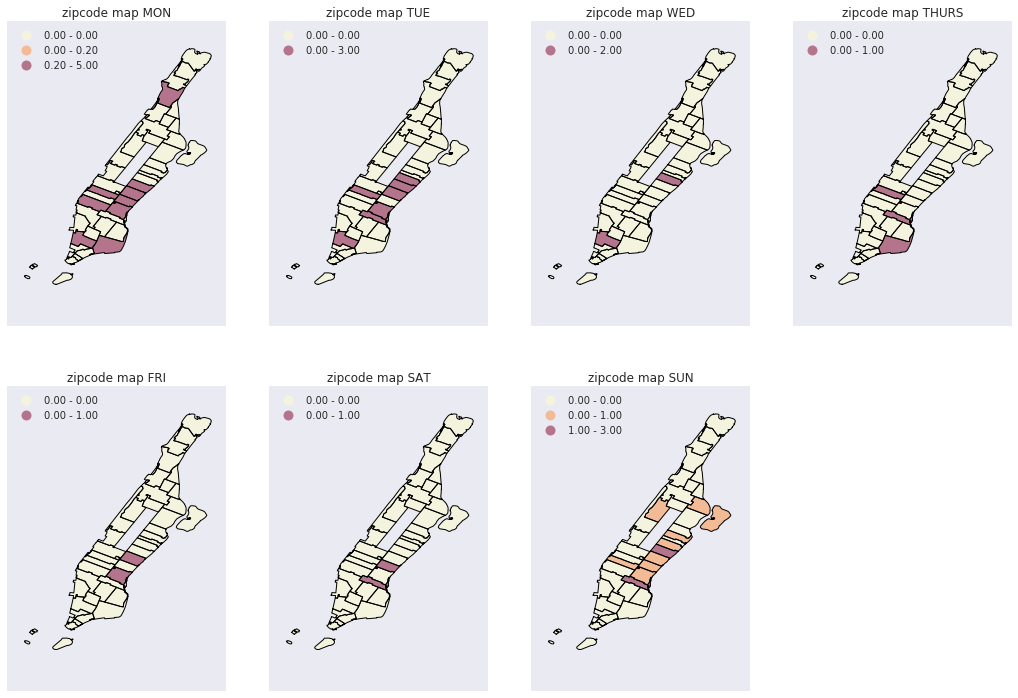

In [398]:
weekday = ["MON", "TUE", "WED", "THURS", "FRI", "SAT", "SUN"]
fig = plt.figure(figsize=(18,12))
for i in range(0,7):
    zip_shape = zip_shape.to_crs(epsg=4326)
    ax = fig.add_subplot(241+i)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    zip_shape.plot(column=i, scheme='QUANTILES', k=10, colormap='YlOrRd', ax=ax, legend=True)
    plt.title("zipcode map {}".format(weekday[i]))
    plt.legend()
plt.savefig("fig/weekdaymap")

In [304]:
temporal_taffic = incident.groupby(["hour", "incident_zip"]).size().unstack().T.fillna(0)
a = temporal_taffic.reset_index().rename(columns={"incident_zip": "ZIPCODE"})


shape_path= "NYC_shapefiles/ZIP_CODE_040114.shp"
zip_shape = GeoDataFrame.from_file(shape_path)
zip_shape = zip_shape[zip_shape["PO_NAME"] == "New York"]
zip_shape.ZIPCODE = zip_shape.ZIPCODE.astype(int)
zip_shape = zip_shape.merge(a, on="ZIPCODE")

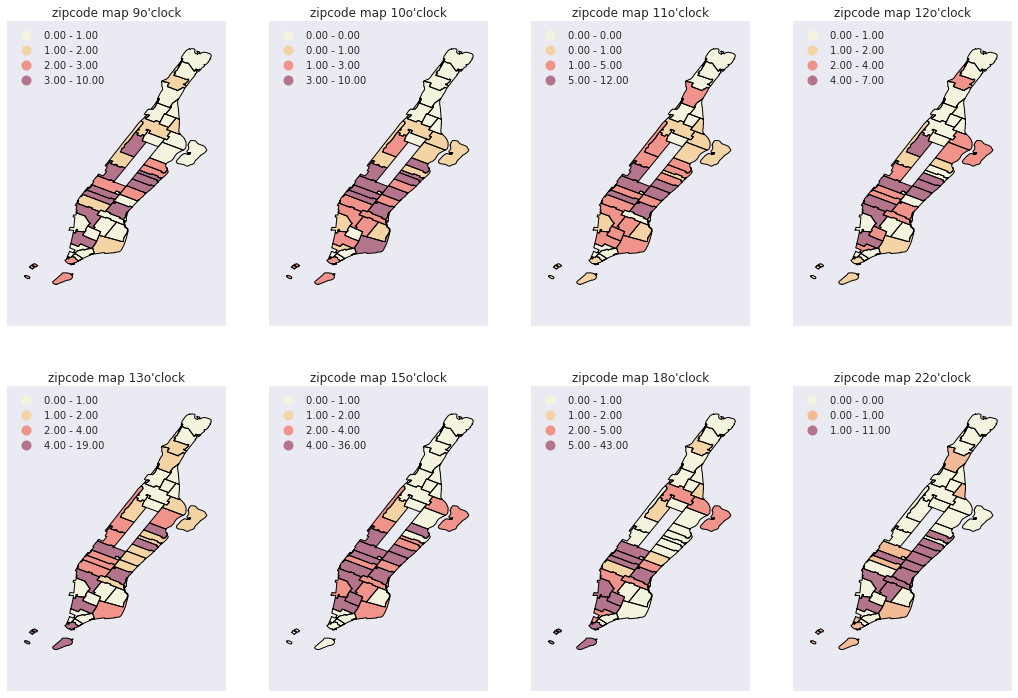

In [397]:
hour = [9,10,11,12,13,15,18,22]
fig = plt.figure(figsize=(18,12))
for k, i in enumerate(hour):
    zip_shape = zip_shape.to_crs(epsg=4326)
    ax = fig.add_subplot(241+k)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    zip_shape.plot(column=i, scheme='QUANTILES', k=4, colormap='YlOrRd', ax=ax, legend=True)
    plt.title("zipcode map {}".format(str(i)+"o'clock"))
    plt.legend()
plt.savefig("fig/hourmap")

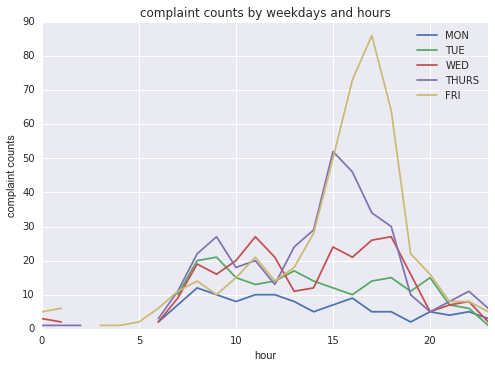

In [373]:
temporal_incident

temporal_incident_weekday = temporal_incident[temporal_incident["weekday"]<5]
plot_timeseries(temporal_incident_weekday, "complaint counts by weekdays and hours", 
                "complaint counts")

In [388]:
incident = pd.read_csv("data/complaints_lower_manhattan.csv")
incident = incident.drop('Unnamed: 0', 1)
incident = incident.dropna()

In [389]:
temporal_incident = add_temporal_feature("created_date", incident)

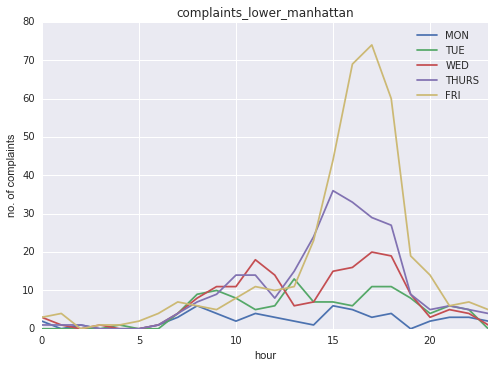

In [395]:
title = "complaints_lower_manhattan"
temporal_incident_weekday = temporal_incident[temporal_incident["weekday"]<5]
temporal_incident_weekday.groupby(["hour", "weekday"]).size().unstack().fillna(0).plot()
plt.title(title)
plt.ylabel("no. of complaints")
plt.legend(labels=["MON", "TUE", "WED", "THURS", "FRI"])
plt.savefig("fig/"+title)